# SLO Twitter Data Analysis

Note: Using a subset of the entire JSON file for time-saving testing purposes.  It seems the original "SLO analysis.ipynb" utilizes multiple JSON files that are already auto-encoded to be associated with certain SLO mining companies.  I don't have access to those JSON files, so I am currently just using the "dataset_slo_20100101-20180510.json" raw Tweet file and the "dataset_20100101-20180510.csv" processed Tweet file from the "sloclassifiers" directory on Borg.

## Read JSON file and convert to Pandas Dataframe

In [11]:
"""
Social License to Operate
Advisor: Professor VanderLinden
Name: Joseph Jinn
Date: 5-29-19

SLO Twitter Dataset Analysis

###########################################################
Notes:

Json file sample:

{"in_reply_to_status_id_str":"305159434462691328","in_reply_to_status_id":305159434462691328,"coordinates":null,

"created_at":"Sat Feb 23 03:40:21 +0000 2013","truncated":false,"in_reply_to_user_id_str":"2768501",

"source":"<a href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\">Twitter for iPhone<\/a>",

"retweet_count":0,"retweeted":false,"geo":null,"in_reply_to_screen_name":"abcnews","is_quote_status":false,

"entities":{"urls":[],"hashtags":[],"user_mentions":[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501",

"name":"ABC News","id":2768501}],"symbols":[]},"full_text":"@abcnews About bloody time. Adani only wants FIFO Indian

workers for his Bowen basin mines.","id_str":"305160140833816576","in_reply_to_user_id":2768501,

"display_text_range":[0,91],"favorite_count":0,"id":305160140833816576,"place":null,"contributors":null,

"lang":"en","user":{"utc_offset":36000,"friends_count":1385,"profile_image_url_https":

"https:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg","listed_count":3,

"profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","default_profile_image":false,

"favourites_count":533,"description":"Train Driver extraordinaire, proud Union Leftie and Labor supporter.

Cant stand the LNP and their regressive ideas. Mainly political but I do enjoy a laugh.",

"created_at":"Tue Aug 21 23:23:52 +0000 2012","is_translator":false,

"profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","protected":false,

"screen_name":"DazzDicko","id_str":"772466924","profile_link_color":"1DA1F2","is_translation_enabled":false,

"translator_type":"none","id":772466924,"geo_enabled":true,"profile_background_color":"C0DEED","lang":"en",

"has_extended_profile":false,"profile_sidebar_border_color":"C0DEED","profile_text_color":"333333","verified":false,

"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg",

"time_zone":"Australia\/Brisbane","url":null,"contributors_enabled":false,"profile_background_tile":false,

"entities":{"description":{"urls":[]}},"statuses_count":5176,"follow_request_sent":false,"followers_count":945,

"profile_use_background_image":true,"default_profile":true,"following":false,"name":"Daryl Dickson",

"location":"Far North Queensland","profile_sidebar_fill_color":"DDEEF6","notifications":false},"favorited":false}

###########################################################
Resources Used:

dataset_slo_20100101-20180510.json
dataset_20100101-20180510.csv

"""

################################################################################################################
################################################################################################################
import json
import logging as log
import re
import string
import warnings
import tensorflow as tf
import time
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from pathlib import Path
from urllib.parse import urlparse
import emoji

from nltk.corpus import stopwords

#############################################################

# Note: Need to set level AND turn on debug variables in order to see all debug output.
log.basicConfig(level=log.DEBUG)
tf.logging.set_verbosity(tf.logging.ERROR)

# Miscellaneous parameter adjustments for pandas and python.
# pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

"""
Turn debug log statements for various sections of code on/off.
"""
# Debug the initial dataset import and feature/target set creation.
debug_preprocess_tweets = True

################################################################################################################
################################################################################################################

# Read in the JSON file.
# twitter_data = pd.read_json("json/dataset_slo_20100101-20180510.json",
#                             orient='records',
#                             lines=True,
#                             chunksize=1000)

twitter_data = pd.read_json("D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
                            orient='records',
                            lines=True,
                            chunksize=1000)

# Create a empty Pandas dataframe.
twitter_dataframe = pd.DataFrame()

# Consider only subset of entire JSON fire for testing purposes.
counter = 0
for data in twitter_data:
    twitter_dataframe = twitter_dataframe.append(data, ignore_index=True)
    counter += 1
    if counter >= 2:
        break

if debug_preprocess_tweets:
    # Print shape and column names.
    log.debug("\n")
    log.debug("The shape of the twitter dataframe:")
    log.debug(twitter_dataframe.shape)
    log.debug("\n")
    log.debug("The columns of the twitter dataframe:")
    log.debug(twitter_dataframe.columns)
    log.debug("\n")
    log.debug("A sample of the twitter dataframe:")
    log.debug(twitter_dataframe.sample(1))
    log.debug("\n")

################################################################################################################

# Read in the CSV file.
# tweet_dataset_processed = \
#     pd.read_csv("datasets/dataset_20100101-20180510.csv", sep=",")

tweet_dataset_processed = \
    pd.read_csv("D:/Dropbox/summer-research-2019/datasets/dataset_20100101-20180510.csv", sep=",")

# Reindex and shuffle the data randomly.
tweet_dataset_processed = tweet_dataset_processed.reindex(
    pd.np.random.permutation(tweet_dataset_processed.index))

# Generate a Pandas dataframe.
tweet_dataframe_processed = pd.DataFrame(tweet_dataset_processed)

if debug_preprocess_tweets:
    # Print shape and column names.
    log.debug("\n")
    log.debug("The shape of our SLO tweet dataframe:")
    log.debug(tweet_dataframe_processed.shape)
    log.debug("\n")
    log.debug("The columns of our SLO tweet dataframe:")
    log.debug(tweet_dataframe_processed.columns)
    log.debug("\n")
    log.debug("A sample from the tweet dataframe:")
    log.debug(tweet_dataframe_processed.sample(10))
    log.debug("\n")

    # So log.debug messages do not intersperse in between print messages.
    time.sleep(2)

DEBUG:root:

DEBUG:root:The shape of the twitter dataframe:
DEBUG:root:(2000, 27)
DEBUG:root:

DEBUG:root:The columns of the twitter dataframe:
DEBUG:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
DEBUG:root:

DEBUG:root:A sample of the twitter dataframe:
DEBUG:root:      contributors coordinates          created_at display_text_range  \
1874           nan        None 2014-09-05 10:32:35           [0, 137]   

                                               entities extended_entities  \
1874  {'urls': [{'display_url': 'ow.ly/B7C

## Tweet Properties

### Time Series:

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


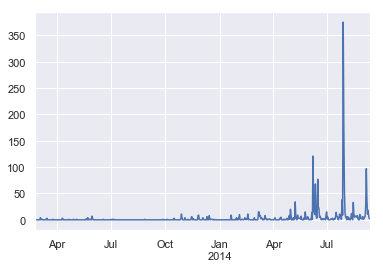

In [12]:
def time_series():
    """
    Visualize the Tweet creation time based on time-date information in the raw JSON Tweet file.

    Note: The processed CSV dataset file does not contain this information.

    :return: None.
    """
    plt.figure()
    pd.to_datetime(twitter_dataframe['created_at']).value_counts().resample('1D').sum().plot()
    plt.show()


# Call the function.
time_series()

### Re-Tweet Statistics:

Re-Tweet Statistics for JSON raw data:
False    2000
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset:
True     441619
False    217363
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset by Company:
Number of Tweets that are or aren't re-tweets by associated company: 
company     retweeted
adani       False        106946
            True         321505
bhp         False         40287
            True          29164
cuesta      False            63
                          ...  
santos      True          61604
whitehaven  False          6504
            True           8206
woodside    False          9937
            True           5560
Length: 22, dtype: int64

Proportion of Re-Tweets versus non Re-Tweets by associated company: 


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:updat

<Figure size 432x288 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matp

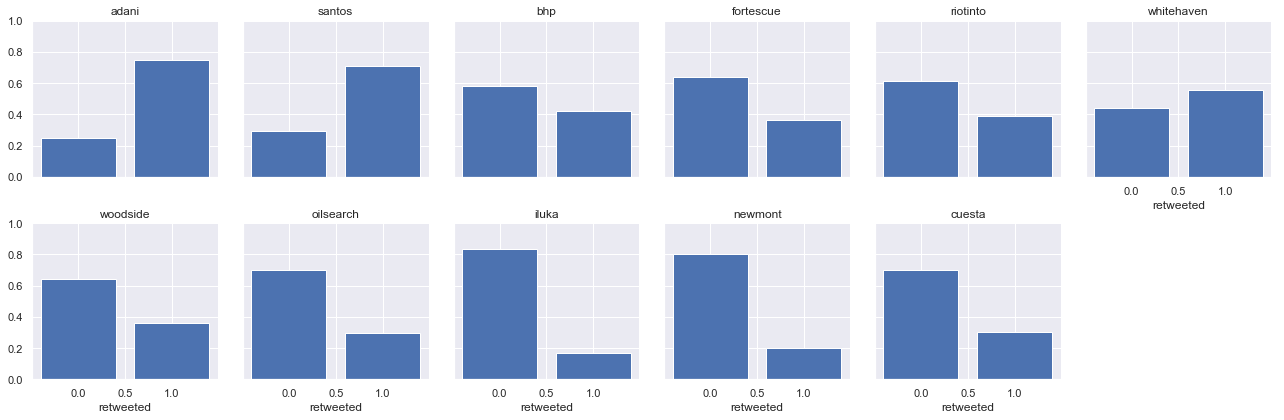

In [14]:
def retweeted():
    """
    Re-tweet related statistics.

    :return: None.
    """

    print("Re-Tweet Statistics for JSON raw data:")
    print(twitter_dataframe['retweeted'].value_counts())
    print()

    print("Re-Tweet Statistics for CSV dataset:")
    print(tweet_dataframe_processed['retweeted'].value_counts())
    print()

    def bar_plot(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs:
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        height = data[col].value_counts(normalize=True)
        height.sort_index(inplace=True)
        ax.bar(height.index, height)

    print("Re-Tweet Statistics for CSV dataset by Company:")
    print("Number of Tweets that are or aren't re-tweets by associated company: ")
    print(tweet_dataframe_processed.groupby(['company', 'retweeted']).size())
    print()

    # Graph the Re-Tweet Statistics.
    print("Proportion of Re-Tweets versus non Re-Tweets by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['retweeted', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1))
    grid.map_dataframe(bar_plot, 'retweeted').set_titles('{col_name}')
    plt.show()


# Call the function.
retweeted()

### User Statistics:

Proportion of Tweets for top unique users by associated company: 


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


<Figure size 432x288 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matp

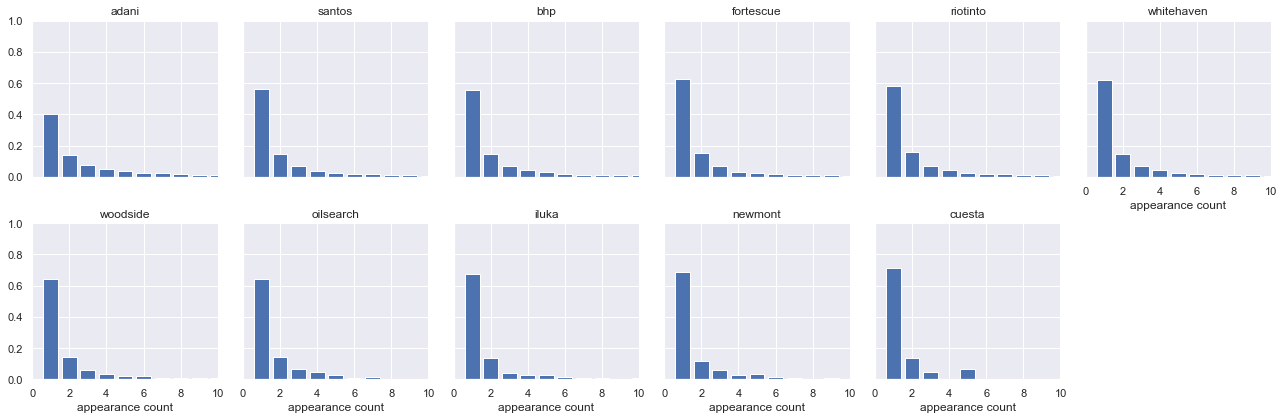

User Statistics for CSV dataset by Company: 
Top unique user Tweet count by associated company.
company                  
adani     WgarNews          0.0
          GalileeBlockade   0.0
          MarkPlackett1     0.0
          SeanBradbery      0.0
          garland_paige     0.0
                             ..
woodside  Woodside_Park     0.0
          CFSAlerts         0.0
          WoodsideEnergy    0.0
          IncidentAlertS1   0.0
          aus_business      0.0
Name: user_screen_name, Length: 55, dtype: float64



In [18]:
def users():
    """
    User related statistics.

    :return: None.
    """

    def bar_plot_zipf(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs:
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        height = data[col].value_counts().value_counts(normalize=True)
        ax.bar(height.index, height)

    # Graph the User Statistics.
    print("Proportion of Tweets for top unique users by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['user_screen_name', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(bar_plot_zipf, 'user_screen_name').set_titles('{col_name}').set_xlabels('appearance count')
    plt.show()

    pd.set_option("display.precision", 12)
    print("User Statistics for CSV dataset by Company: ")
    print("Top unique user Tweet count by associated company.")
    print(
        tweet_dataframe_processed[['company', 'user_screen_name']].groupby('company')
            .apply(lambda x: x['user_screen_name'].value_counts(normalize=True).head())
        # .value_counts(normalize=True)\
        # .sort_index(ascending=False).head())
    )
    print()


# Call the function.
users()

### Character Count Statistics:

Character Statistics for CSV dataset by Company: 
Character count relative frequency histogram: 


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


<Figure size 432x288 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matp

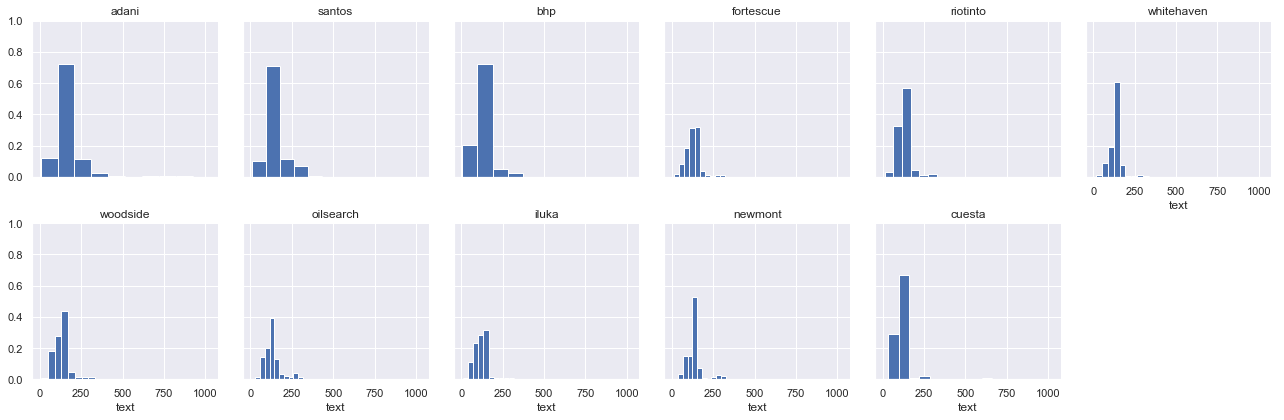

In [19]:
def character_counts():
    """
    Character related statistics.

    :return: None.
    """

    def relhist_proc(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs:
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        proc = kwargs.pop('proc')
        processed = proc(data[col])
        # relative frequency histgram
        # https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram
        ax.hist(processed, weights=np.ones_like(processed) / processed.size, **kwargs)

    def char_len(tweets):
        """
        Determine the length of the Tweet text.

        :param tweets: the Tweet text.
        :return: the length of the Tweet.
        """
        return tweets.str.len()

    print("Character Statistics for CSV dataset by Company: ")
    print("Character count relative frequency histogram: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['text', 'company']], col='company', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(relhist_proc, 'text', bins=10, proc=char_len).set_titles('{col_name}')
    plt.show()


# Call the function.
character_counts()